<a href="https://colab.research.google.com/github/hyunku/Brain-Machine_Interface_System/blob/main/make_pretrain_personal_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 라이브러리 import

In [4]:
print(f'joblib version: {joblib.__version__}') # check your joblib version is 1.1.0

joblib version: 1.1.0


In [38]:
!pip uninstall joblib

Found existing installation: joblib 1.2.0
Uninstalling joblib-1.2.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/joblib-1.2.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/joblib/*
Proceed (y/n)? y
  Successfully uninstalled joblib-1.2.0


In [39]:
!pip install joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 7.2 MB/s 


In [1]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
##필요 모듈 import
import os
import sys
import pandas as pd
import numpy as np
from scipy import signal
import mne
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import pyplot as plt
from datetime import datetime
import time
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
import math
from google.colab import drive
import joblib
drive.mount('/content/drive')

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
print(f'joblib version: {joblib.__version__}') # check you joblib version is 1.1.0

joblib version: 1.1.0


# 2. 데이터 로드

In [6]:
eeg = pd.read_csv("/content/drive/MyDrive/MNE/make_pretrain/hoeyoung/eeg_2022-10-12_15-01-31.csv")
train = pd.read_csv("/content/drive/MyDrive/MNE/make_pretrain/hoeyoung/session_train_2022-10-12_15-01-38.csv")

In [7]:
eeg

,timestamp,ch0-time0,ch0-time1,ch0-time2,ch0-time3,ch0-time4,ch0-time5,ch0-time6,ch0-time7,ch0-time8,...,ch15-time52,ch15-time53,ch15-time54,ch15-time55,ch15-time56,ch15-time57,ch15-time58,ch15-time59,ch15-time60,ch15-time61
0,2022-10-12T15:01:32.905723,24019.855144,24017.910542,24018.581095,24016.368272,24008.813382,23991.267263,23989.836751,23976.738629,23981.208978,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
1,2022-10-12T15:01:33.414495,24024.839583,24025.018397,24045.157319,24027.812365,24036.350731,24021.375063,24036.462490,24026.873592,24035.121385,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
2,2022-10-12T15:01:33.919484,24072.582909,24075.913319,24074.751028,24085.278700,24052.175766,24033.333246,24012.993158,23993.614196,23995.067059,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
3,2022-10-12T15:01:34.431333,23906.844724,23913.662006,23910.957445,23926.178983,23923.250904,23930.023483,23924.614361,23926.000169,23929.621152,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
4,2022-10-12T15:01:34.943229,23774.522397,23810.285188,23827.048996,23819.784679,23816.588380,23813.123860,23827.116052,23814.688482,23819.359996,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,2022-10-12T15:32:11.749296,15559.406943,15330.614487,15063.309975,14625.260487,14499.733090,14400.960732,14359.855874,14464.037354,14626.176909,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
3593,2022-10-12T15:32:12.261388,16278.797839,16252.936870,16164.334555,16142.586308,16073.720583,16091.199647,15986.749945,16056.062705,16021.819833,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
3594,2022-10-12T15:32:12.763349,17378.727183,17452.152664,17567.666479,17621.243611,17655.710000,17663.376649,17651.530224,17661.744971,17619.723692,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352
3595,2022-10-12T15:32:13.278505,14597.924304,14634.379999,14620.566621,14656.061191,14625.372246,14640.459673,14609.524859,14649.623889,14643.655973,...,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352


In [8]:
# use 6chan data
eeg = eeg.iloc[:,:62*6+1]
eeg

,timestamp,ch0-time0,ch0-time1,ch0-time2,ch0-time3,ch0-time4,ch0-time5,ch0-time6,ch0-time7,ch0-time8,...,ch5-time52,ch5-time53,ch5-time54,ch5-time55,ch5-time56,ch5-time57,ch5-time58,ch5-time59,ch5-time60,ch5-time61
0,2022-10-12T15:01:32.905723,24019.855144,24017.910542,24018.581095,24016.368272,24008.813382,23991.267263,23989.836751,23976.738629,23981.208978,...,22807.496525,22808.994092,22808.725871,22781.099115,22747.951478,22765.609356,22771.085533,22780.227397,22753.159434,22757.629783
1,2022-10-12T15:01:33.414495,24024.839583,24025.018397,24045.157319,24027.812365,24036.350731,24021.375063,24036.462490,24026.873592,24035.121385,...,22899.853933,22889.080392,22897.931683,22893.528389,22867.063924,22873.277709,22865.834578,22854.815168,22831.323484,22841.448825
2,2022-10-12T15:01:33.919484,24072.582909,24075.913319,24074.751028,24085.278700,24052.175766,24033.333246,24012.993158,23993.614196,23995.067059,...,22769.006821,22767.442199,22741.313009,22742.967039,22723.252800,22726.560858,22720.861163,22731.969980,22737.446158,22744.419902
3,2022-10-12T15:01:34.431333,23906.844724,23913.662006,23910.957445,23926.178983,23923.250904,23930.023483,23924.614361,23926.000169,23929.621152,...,22762.725981,22762.748332,22739.413111,22737.848489,22743.749350,22745.716303,22770.035001,22749.583155,22760.311992,22785.792981
4,2022-10-12T15:01:34.943229,23774.522397,23810.285188,23827.048996,23819.784679,23816.588380,23813.123860,23827.116052,23814.688482,23819.359996,...,22913.667311,22905.888904,22907.498229,22903.586674,22923.747948,22896.635282,22896.434116,22883.961843,22867.801531,22866.885110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,2022-10-12T15:32:11.749296,15559.406943,15330.614487,15063.309975,14625.260487,14499.733090,14400.960732,14359.855874,14464.037354,14626.176909,...,12852.677745,12811.103500,12803.772128,12759.247453,12748.496264,12723.819938,12652.115542,12601.891172,12535.126511,12492.457031
3593,2022-10-12T15:32:12.261388,16278.797839,16252.936870,16164.334555,16142.586308,16073.720583,16091.199647,15986.749945,16056.062705,16021.819833,...,12772.144410,12846.128684,12887.188838,12953.595871,13009.072901,13164.171656,13255.456180,13387.890266,13490.574180,13632.843033
3594,2022-10-12T15:32:12.763349,17378.727183,17452.152664,17567.666479,17621.243611,17655.710000,17663.376649,17651.530224,17661.744971,17619.723692,...,10099.300456,10307.708121,10462.136324,10591.955256,10689.431213,10732.391266,10719.248440,10760.621519,10735.453455,10766.723545
3595,2022-10-12T15:32:13.278505,14597.924304,14634.379999,14620.566621,14656.061191,14625.372246,14640.459673,14609.524859,14649.623889,14643.655973,...,11892.737376,11917.972495,11913.479795,11947.253281,11931.562356,11934.646897,11957.691545,11978.970406,11992.850839,12031.564061


# 3. 전처리 + 모델링

In [9]:
''' define parameters '''

# n_channels = 16 # hyunku
n_channels = 6 # yeonhee
s_freq = 128  # in Hertz
# ch_names = ['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'F3', 'F4', 'P3', 'P4'] # for 16 channel
ch_names = ['F7', 'F3', 'Fp1', 'Fp2', 'F4', 'F8'] # for 6 channel
ch_types = ['eeg'] * n_channels
all_ch_names = ch_names + ['Task','STM']
all_ch_types = ch_types + ['misc','misc']
p_detrend = 1 # 0: OFF, 1: On
p_normalization = 1 # 0: do not, 1: [0, 1] scaling, 2: standardization (x-mean)/var
p_n_filenames = 7
p_ica_flag = 1
p_ts_psd_flag = 0
l_freqs = 1
h_freqs = 60

In [10]:
''' Function about extract filtered data from data measured by 0.5sec and extract bandpass data from data measuerd by 3sec'''

def filtering_bandpass_update(data):

##### make filtered data by 0.5sec

  info = mne.create_info(ch_names=ch_names, sfreq=s_freq, ch_types='eeg') # make info
  st_idx = 1
  time = 62
  ch_li = []  

  # gather and average from buffer
  for chan in range(n_channels):
    ch_li.append(data.iloc[:,time*chan + st_idx:time*(chan+1) + st_idx].sum(axis=1) / len(data.iloc[:,time*chan + st_idx:time*(chan+1) + st_idx].T)) # 1 ~ 62*1 + 1, 62*1 + 1 ~ 62*2 + 1

  ch_df = pd.DataFrame(ch_li).T
  t = pd.DataFrame(data.iloc[:,0])

  # dataframe -> mne rawarray
  raw = mne.io.RawArray(ch_df.T, info, verbose=False)    # make mne object

  # filtering (by Hertz)
  raw_filtered = raw.filter(l_freq=60,h_freq=.5,picks='eeg', method='iir').to_data_frame().drop(columns=['time']) # 0.5 ~ 60

  # make column names
  ch_names_arr = np.char.array(['F7', 'F3', 'Fp1', 'Fp2', 'F4', 'F8']) # for 6 channel
  raw_filtered.columns = ch_names_arr

  # add time column
  df = pd.concat([t,raw_filtered], axis=1)
  origin_df = df.iloc[5:,:]
  origin_df.reset_index(drop=True, inplace=True)

  
##### make bandpass by 3sec

  # initialize info
  info = mne.create_info(ch_names=ch_names, sfreq=s_freq, ch_types='eeg') # make info
  st_idx = 1
  time = 62
  ch_li = []

  # gather and average from buffer
  for chan in range(n_channels):
    ch_li.append(data.iloc[:,time*chan + st_idx:time*(chan+1) + st_idx].sum(axis=1) / len(data.iloc[:,time*chan + st_idx:time*(chan+1) + st_idx].T)) # 1 ~ 62*1 + 1, 62*1 + 1 ~ 62*2 + 1

  ch_df = pd.DataFrame(ch_li).T

  # time rolling to gather 3sec data
  ch_df = ch_df.rolling(window=6).mean().iloc[5:,:]
  ch_df.reset_index(drop=True, inplace=True)

  # dataframe -> mne rawarray
  raw = mne.io.RawArray(ch_df.T, info, verbose=False)

  # get bandpass (by Hertz)
  delta_band = raw.filter(l_freq=4,h_freq=.5,picks='eeg', method='iir').to_data_frame().drop(columns=['time']) # 0.5 ~ 4
  theta_band = raw.filter(l_freq=8,h_freq=4,picks='eeg', method='iir').to_data_frame().drop(columns=['time']) # 4 ~ 8
  alpha_band = raw.filter(l_freq=12,h_freq=8,picks='eeg', method='iir').to_data_frame().drop(columns=['time']) # 8 ~12
  beta_band = raw.filter(l_freq=30,h_freq=12,picks='eeg', method='iir').to_data_frame().drop(columns=['time']) # 12 ~ 30
  gamma_band = raw.filter(l_freq=45,h_freq=30,picks='eeg', method='iir').to_data_frame().drop(columns=['time']) # 30 ~ 45

  # make column names
  ch_names_arr = np.char.array(['F7', 'F3', 'Fp1', 'Fp2', 'F4', 'F8']) # for 6 channel
  band_labels_arr = np.char.array(["-Delta", "-Theta", "-Alpha", "-Beta", "-Gamma"])
  ch_band_labels = ch_names_arr[np.newaxis, :] + band_labels_arr[:, np.newaxis]
  new_cols = ch_band_labels.flatten()

  # gather each bandpass data
  banded = pd.concat([delta_band, theta_band, alpha_band, beta_band, gamma_band], axis=1)
  banded.columns = new_cols

###### gather 0.5sec origin data and 3sec bandpass data

  filtered = pd.concat([origin_df, banded], axis=1)

  return filtered

In [11]:
# data filtering using by user-defined function
eeg = filtering_bandpass_update(eeg)
eeg

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 60 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 60.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 0.5 - 4 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 4.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-st

,timestamp,F7,F3,Fp1,Fp2,F4,F8,F7-Delta,F3-Delta,Fp1-Delta,...,Fp1-Beta,Fp2-Beta,F4-Beta,F8-Beta,F7-Gamma,F3-Gamma,Fp1-Gamma,Fp2-Gamma,F4-Gamma,F8-Gamma
0,2022-10-12T15:01:35.453403,2.405457e+10,1.191943e+10,-6.351243e+09,1.150530e+10,1.911188e+10,2.286916e+10,2.393116e+10,1.172386e+10,-6.531996e+09,...,-6.532036e+09,1.136527e+10,1.896431e+10,2.279354e+10,2.393111e+10,1.172378e+10,-6.532034e+09,1.136527e+10,1.896431e+10,2.279354e+10
1,2022-10-12T15:01:35.967772,2.384895e+10,1.171024e+10,-6.574914e+09,1.128325e+10,1.891619e+10,2.264139e+10,2.395707e+10,1.175851e+10,-6.509996e+09,...,-6.505394e+09,1.139673e+10,1.900842e+10,2.282935e+10,2.394995e+10,1.174323e+10,-6.525201e+09,1.137751e+10,1.899020e+10,2.281084e+10
2,2022-10-12T15:01:36.477795,2.407517e+10,1.194618e+10,-6.354506e+09,1.151514e+10,1.915051e+10,2.288921e+10,2.391071e+10,1.172515e+10,-6.545930e+09,...,-6.556835e+09,1.134907e+10,1.897466e+10,2.278524e+10,2.391664e+10,1.171825e+10,-6.560332e+09,1.134549e+10,1.897071e+10,2.277995e+10
3,2022-10-12T15:01:36.989028,2.381477e+10,1.167992e+10,-6.634535e+09,1.123491e+10,1.889964e+10,2.260111e+10,2.390659e+10,1.172324e+10,-6.553359e+09,...,-6.578093e+09,1.133265e+10,1.897254e+10,2.277154e+10,2.393005e+10,1.173500e+10,-6.554249e+09,1.135537e+10,1.899428e+10,2.279437e+10
4,2022-10-12T15:01:37.501105,2.408811e+10,1.196528e+10,-6.365595e+09,1.151722e+10,1.918171e+10,2.290091e+10,2.388415e+10,1.170341e+10,-6.591174e+09,...,-6.572497e+09,1.134135e+10,1.899269e+10,2.278097e+10,2.392127e+10,1.173227e+10,-6.569602e+09,1.134507e+10,1.899734e+10,2.278777e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,2022-10-12T15:32:11.749296,1.558731e+10,4.580162e+09,-1.175386e+10,1.018800e+09,1.310955e+10,1.176170e+10,1.565031e+10,4.659516e+09,-1.158583e+10,...,-1.169919e+10,1.056292e+09,1.316509e+10,1.178224e+10,1.560211e+10,4.598981e+09,-1.168231e+10,1.078346e+09,1.318081e+10,1.179594e+10
3588,2022-10-12T15:32:12.261388,1.555623e+10,4.554511e+09,-1.177692e+10,9.889958e+08,1.308509e+10,1.173088e+10,1.571246e+10,4.738829e+09,-1.150172e+10,...,-1.165425e+10,1.113744e+09,1.320186e+10,1.180449e+10,1.559005e+10,4.584380e+09,-1.169807e+10,1.065843e+09,1.316437e+10,1.176631e+10
3589,2022-10-12T15:32:12.763349,1.556633e+10,4.560175e+09,-1.177194e+10,9.985319e+08,1.309211e+10,1.172971e+10,1.565895e+10,4.660270e+09,-1.158740e+10,...,-1.173409e+10,1.029258e+09,1.313516e+10,1.172427e+10,1.555341e+10,4.541485e+09,-1.173976e+10,1.020244e+09,1.312961e+10,1.172046e+10
3590,2022-10-12T15:32:13.278505,1.554801e+10,4.544021e+09,-1.178657e+10,9.807806e+08,1.307722e+10,1.170786e+10,1.559658e+10,4.584953e+09,-1.167141e+10,...,-1.175787e+10,9.976039e+08,1.311588e+10,1.170142e+10,1.557020e+10,4.562763e+09,-1.171520e+10,1.046215e+09,1.315280e+10,1.173753e+10


In [12]:
train

,timestamp,event(1:up,-1:down)
0,'2022-10-12T15:01:40.076485',1,NaN
1,'2022-10-12T15:01:49.079903',-1,NaN
2,'2022-10-12T15:01:58.086313',1,NaN
3,'2022-10-12T15:02:07.091411',-1,NaN
4,'2022-10-12T15:02:16.096814',-1,NaN
...,...,...,...
195,'2022-10-12T15:31:23.286544',-1,NaN
196,'2022-10-12T15:31:32.292840',1,NaN
197,'2022-10-12T15:31:41.299686',1,NaN
198,'2022-10-12T15:31:50.305637',1,NaN


In [13]:
# get ready to merge train data to eeg data

eeg['timestamp'] = pd.to_datetime(eeg['timestamp'])
train['timestamp'] = pd.to_datetime(train['timestamp'])
train = train.rename(columns={' event(1:up':'event'})

eeg['event']=0

In [14]:
# deploy target data to eeg data by timestamp (merge train data and eeg data)

for i in range(0,len(train)-1):
  for t in range(0,len(eeg)):
    if train['timestamp'][i]< eeg['timestamp'][t] and (train['timestamp'][i+1]>eeg['timestamp'][t])==True:
       eeg.event[t]=train.event[i]

# drop the columns which doesn't have target data
eeg.drop(eeg.loc[eeg['event']==0].index, inplace=True)
eeg.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
eeg

,timestamp,F7,F3,Fp1,Fp2,F4,F8,F7-Delta,F3-Delta,Fp1-Delta,...,Fp2-Beta,F4-Beta,F8-Beta,F7-Gamma,F3-Gamma,Fp1-Gamma,Fp2-Gamma,F4-Gamma,F8-Gamma,event
0,2022-10-12 15:01:40.570337,2.407097e+10,1.196585e+10,-6.456269e+09,1.146589e+10,1.922022e+10,2.287504e+10,2.365455e+10,1.150059e+10,-6.895160e+09,...,1.126091e+10,1.899498e+10,2.271412e+10,2.387653e+10,1.169975e+10,-6.690423e+09,1.126395e+10,1.899715e+10,2.271512e+10,1
1,2022-10-12 15:01:41.082834,2.376785e+10,1.164963e+10,-6.780028e+09,1.113463e+10,1.892102e+10,2.253927e+10,2.385025e+10,1.171038e+10,-6.689645e+09,...,1.128812e+10,1.903830e+10,2.274201e+10,2.393434e+10,1.175964e+10,-6.645006e+09,1.131139e+10,1.906370e+10,2.277207e+10,1
2,2022-10-12 15:01:41.593430,2.404788e+10,1.194815e+10,-6.504294e+09,1.143065e+10,1.921566e+10,2.284751e+10,2.398355e+10,1.184580e+10,-6.569905e+09,...,1.122865e+10,1.899521e+10,2.268577e+10,2.385544e+10,1.168344e+10,-6.738540e+09,1.122539e+10,1.899157e+10,2.268240e+10,1
3,2022-10-12 15:01:42.106199,2.377660e+10,1.166322e+10,-6.795110e+09,1.113127e+10,1.894668e+10,2.254661e+10,2.426501e+10,1.209738e+10,-6.336759e+09,...,1.134736e+10,1.912917e+10,2.281991e+10,2.395976e+10,1.179188e+10,-6.644476e+09,1.132441e+10,1.910404e+10,2.278981e+10,1
4,2022-10-12 15:01:42.616824,2.401903e+10,1.192432e+10,-6.558186e+09,1.138923e+10,1.920513e+10,2.281371e+10,2.419387e+10,1.199761e+10,-6.454345e+09,...,1.121218e+10,1.900991e+10,2.267577e+10,2.386627e+10,1.169803e+10,-6.758340e+09,1.121746e+10,1.901689e+10,2.268380e+10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,2022-10-12 15:31:56.881593,1.579293e+10,4.793669e+09,-1.156114e+10,1.216459e+09,1.328311e+10,1.216591e+10,1.577119e+10,4.802908e+09,-1.151692e+10,...,1.219281e+09,1.330729e+10,1.216126e+10,1.578145e+10,4.778672e+09,-1.154599e+10,1.216164e+09,1.330325e+10,1.215810e+10,1
3549,2022-10-12 15:31:57.394766,1.576188e+10,4.768698e+09,-1.157923e+10,1.192265e+09,1.326878e+10,1.216280e+10,1.575405e+10,4.784122e+09,-1.153386e+10,...,1.202601e+09,1.329518e+10,1.213987e+10,1.576744e+10,4.769519e+09,-1.155280e+10,1.207292e+09,1.329910e+10,1.214276e+10,1
3550,2022-10-12 15:31:57.908876,1.578275e+10,4.782908e+09,-1.157089e+10,1.206342e+09,1.327372e+10,1.214003e+10,1.574591e+10,4.776866e+09,-1.153875e+10,...,1.194583e+09,1.328743e+10,1.212447e+10,1.575715e+10,4.757311e+09,-1.156392e+10,1.196348e+09,1.329048e+10,1.212691e+10,1
3551,2022-10-12 15:31:58.425273,1.574567e+10,4.752072e+09,-1.159460e+10,1.176692e+09,1.325510e+10,1.212740e+10,1.573799e+10,4.775443e+09,-1.153584e+10,...,1.195293e+09,1.329251e+10,1.212249e+10,1.574502e+10,4.749621e+09,-1.156887e+10,1.189715e+09,1.328730e+10,1.211861e+10,1


# 6. 선형 머신러닝 모델들

In [16]:
# data split to X / Y (input / target)
train_eeg=eeg.drop(['timestamp'],axis='columns')
train_eeg=train_eeg.iloc[:,:-1].values
train_event=eeg.drop(['timestamp'],axis='columns')
train_event=train_event.iloc[:,-1].values

# data split to train / test
train_length = math.ceil(len(eeg) * 0.9) # train data : 75% of data 
#test_length = len(eeg)-train_length
""" X_train = X[:train_length]
    y_train = X[1:train_length+1]
    X_test = X[train_length:train_length+test_length]
    y_test = X[train_length+1:train_length+test_length+1]
"""

X_train = train_eeg[:train_length]
y_train= train_event[:train_length]
X_test = train_eeg[train_length:]
y_test = train_event[train_length:]

In [17]:
X_test.shape

(355, 36)

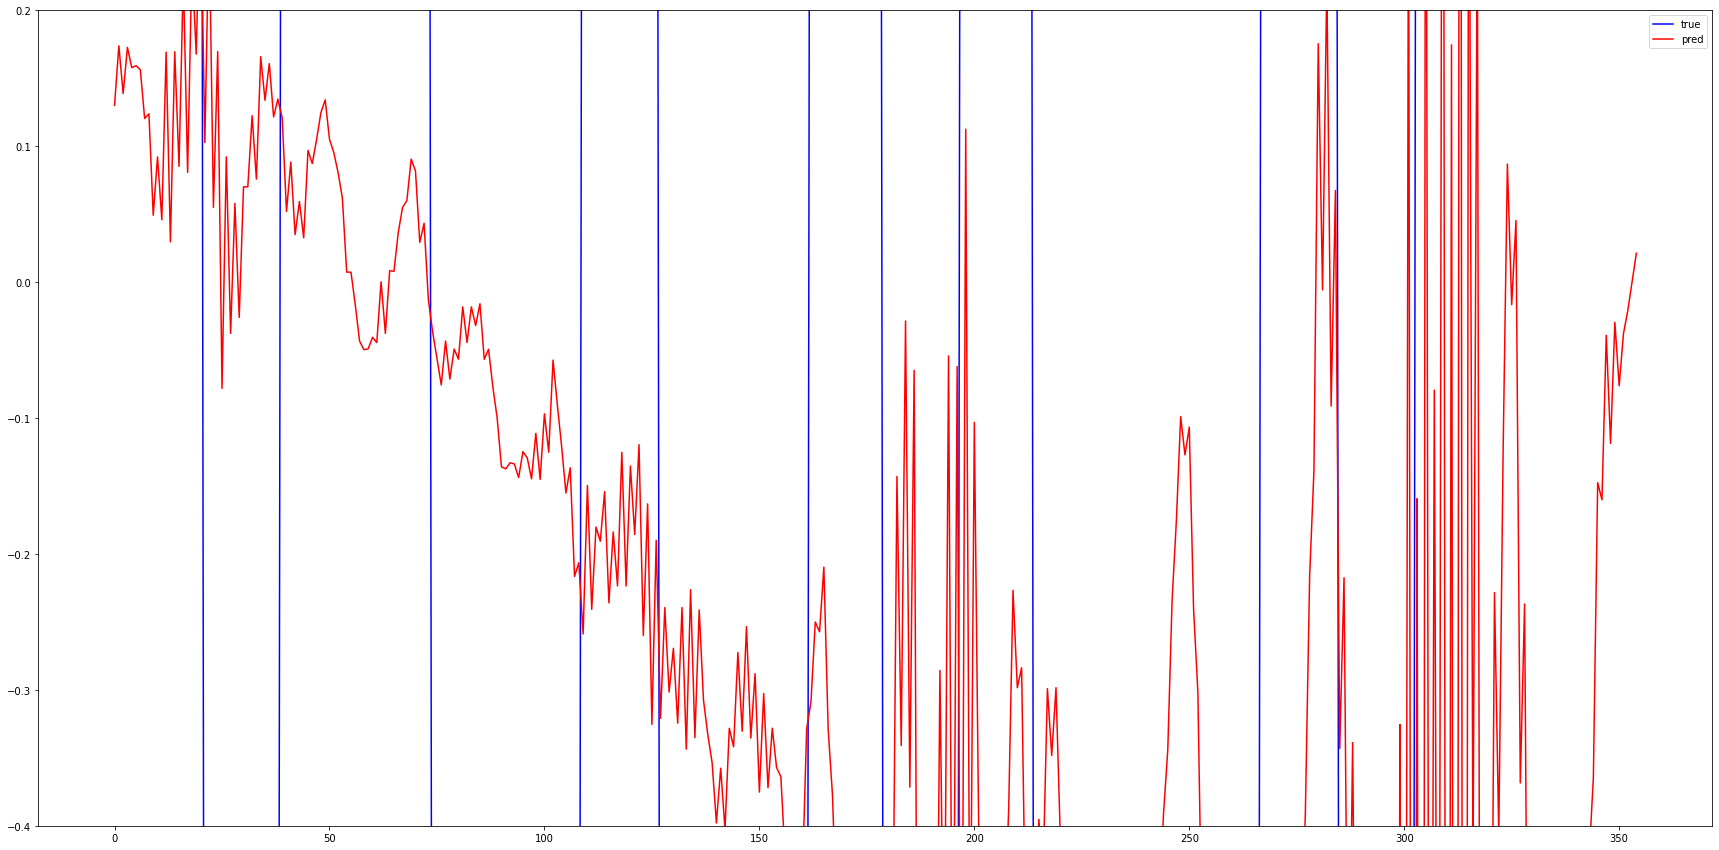

In [18]:
# LinearRegression

model = LinearRegression()
reg = model.fit(X_train, y_train)
y_pred = reg.predict(X_test)

plt.figure(figsize=(30,15))
plt.ylim(-0.4,0.2)
plt.plot(y_test, 'b-', label='true')
plt.plot(y_pred, 'r-', label='pred')
plt.legend()

In [19]:
# save pretrain model
joblib.dump(reg, '/content/drive/MyDrive/MNE/make_pretrain/hoeyoung/lin_model_hoeyoung.pkl')

['/content/drive/MyDrive/MNE/make_pretrain/hoeyoung/lin_model_hoeyoung.pkl']

In [20]:
mymodel = joblib.load('/content/drive/MyDrive/MNE/make_pretrain/hoeyoung/lin_model_hoeyoung.pkl')

In [21]:
X_train.shape

(3198, 36)